# Implementing Python Machine Learning for Images

This notebook skips the Iris dataset exploration and continues with the blog at the label above.

# 3 Scenes - Explore and Create Dataset

<center><font size='6'>3 Scenes Images</font></center>

<table><tr style="background-color:white;">
    <td style="text-align:center;"><span style="font-family:overpass;font-size:20px;color:#303030;">Coast</span></td>
    <td style="text-align:center;"><span style="font-family:overpass;font-size:20px;color:#303030;">Highway</span></td>
    <td style="text-align:center;"><span style="font-family:overpass;font-size:20px;color:#303030;">Forest</span></td>
    </tr>
<tr>
    <td> <img src="./media/coast_collage.png" alt="Coast Collage" style="width: 250px;"/> </td>
    <td> <img src="./media/highway_collage.png" alt="Highway Collage" style="width: 250px;"/> </td>
    <td> <img src="./media/forest_collage.png" alt="Forest Collage" style="width: 250px;"/> </td>
</tr></table>

<center><font size='6'>3 Scenes Holdout Images</font></center>



<table><tr style="background-color:white;">
    <td style="text-align:center;"><span style="font-family:overpass;font-size:20px;color:#303030;">Coast</span></td>
    <td style="text-align:center;"><span style="font-family:overpass;font-size:20px;color:#303030;">Highway</span></td>
    <td style="text-align:center;"><span style="font-family:overpass;font-size:20px;color:#303030;">Forest</span></td>
    </tr>
<tr>
<td> <img src="./3scenes_holdout/coast/coast_n291061.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./3scenes_holdout/highway/highway_urb537.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./3scenes_holdout/forest/forest_nat982.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr>

<tr>
<td> <img src="./3scenes_holdout/coast/coast_n384038.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./3scenes_holdout/highway/highway_art820.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./3scenes_holdout/forest/forest_for15.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr>



</table>

Total of 943 Images

* 359 Coast Images

* 326 Forest Images

* 258 Highway Images

The 3-scenes dataset was created by sampling the 8-scenes dataset from Oliva and Torralba’s 2001 paper, Modeling the shape of the scene: a holistic representation of the spatial envelope.


# Create Dataset

Convert each image into a row with the following values:

* Mean Red

* Mean Green

* Mean Blue

* Std Red

* Std Green

* Std Blue

* 8bin histogram of each of the RGB values


For more information on OpenCV and Histograms:

[PyImageSearch Histogram Blog](https://www.pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/)

In [150]:
from utils.image_class_utils import image_summaries

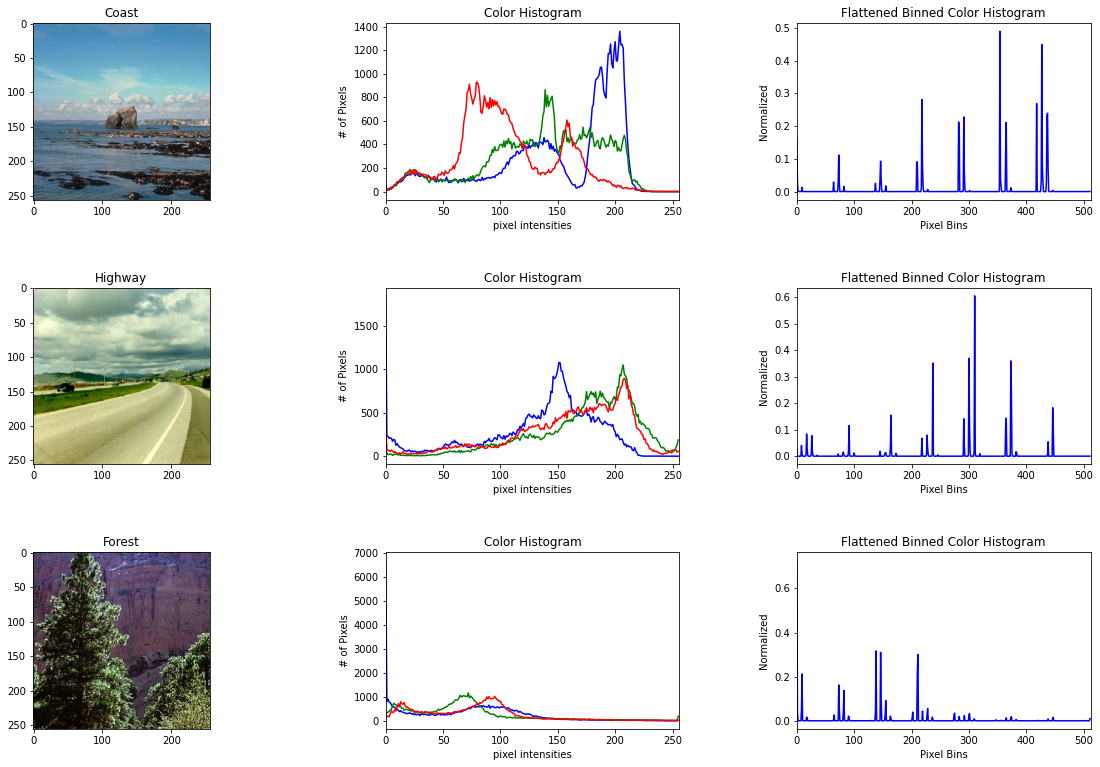

In [151]:
coast_image_path = "./3scenes_holdout/coast/coast_n291061.jpg"
highway_image_path = "./3scenes_holdout/highway/highway_urb537.jpg"
forest_image_path = "./3scenes_holdout/forest/forest_nat982.jpg"
image_summaries([coast_image_path, highway_image_path, forest_image_path], ['Coast', 'Highway', 'Forest'])

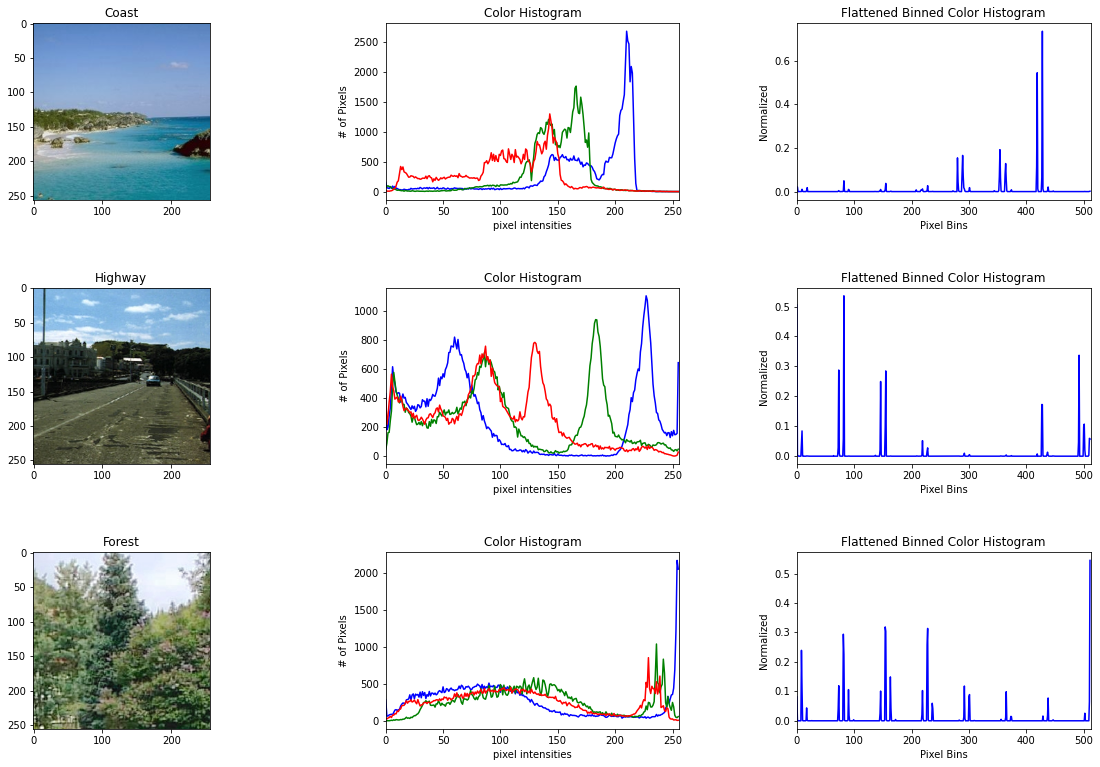

In [152]:
coast_image_path2 = "./3scenes_holdout/coast/coast_n384038.jpg"
highway_image_path2 = "./3scenes_holdout/highway/highway_art820.jpg"
forest_image_path2 = "./3scenes_holdout/forest/forest_for15.jpg"
image_summaries([coast_image_path2, highway_image_path2, forest_image_path2], ['Coast', 'Highway', 'Forest'])

## Feature DataFrame

```
Most machine learning algorithms perform very poorly on raw pixel data. Instead, we perform feature extraction to characterize the contents of the images.

Here we seek to quantify the color of the image by extracting the mean and standard deviation for each color channel in the image.

Given three channels of the image (Red, Green, and Blue), along with two features for each (mean and standard deviation), we have 3 x 2 = 6 total features to quantify the image. We form a feature vector by concatenating the values.
```

The RGBHistogram can also create an 8x8x8 (default) RGB histogram of the color distribution


### Review Histogram Helper

In [153]:
%pycat utils/RGBHistogram.py

In [154]:
import pandas as pd
from utils.image_class_utils import get_image_features
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import numpy as np
import argparse
import os
from utils.RGBHistogram import RGBHistogram

from sklearn.pipeline import make_pipeline


In [155]:
color_stats_only = True

In [156]:
image_features = []
image_features.append(get_image_features(coast_image_path, include_image_name=True, color_stats_only=color_stats_only))
image_features.append(get_image_features(highway_image_path, include_image_name=True, color_stats_only=color_stats_only))
image_features.append(get_image_features(forest_image_path, include_image_name=True, color_stats_only=color_stats_only))

df = pd.DataFrame(data=image_features)
df.head()

,0,1,2,3,4,5,6
0,coast_n291061.jpg,103.461761,136.226120,153.001648,42.752504,49.978204,54.410754
1,highway_urb537.jpg,160.517288,174.638443,132.644318,50.843815,44.193496,52.467947
2,forest_nat982.jpg,74.206787,67.887985,67.258667,45.507354,47.507156,49.199800


In [157]:
df.describe()

,1,2,3,4,5,6
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,112.728612,126.250849,117.634878,46.367891,47.226285,52.026167
std,43.895120,54.069812,44.798741,4.113723,2.902564,2.633418
min,74.206787,67.887985,67.258667,42.752504,44.193496,49.199800
25%,88.834274,102.057053,99.951492,44.129929,45.850326,50.833873
50%,103.461761,136.226120,132.644318,45.507354,47.507156,52.467947
75%,131.989525,155.432281,142.822983,48.175584,48.742680,53.439350
max,160.517288,174.638443,153.001648,50.843815,49.978204,54.410754


At some point we will want to use a StandardScalar on this dataset before we train a model.

### Read in all of the training images and convert to RGB values

In [158]:
imagePaths = paths.list_images("./3scenes")

In [159]:
X = []
labels = []
# loop over our input images
for imagePath in imagePaths:
    # load the input image from disk, compute color channel
    # statistics, and then update our data list
    features = get_image_features(imagePath, color_stats_only=color_stats_only)
    X.append(features)
    # extract the class label from the file path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)


In [160]:
X[0]

[111.94334411621094,
 131.2758026123047,
 142.18763732910156,
 75.62018287504446,
 74.63530695732001,
 84.32736879160724]

In [161]:
labels[0]

'forest'

In [162]:
# encode the labels, converting them from strings to integers
le = LabelEncoder()
y = le.fit_transform(labels)

In [163]:
target_names = list(le.inverse_transform([0,1,2]))
target_names

['coast', 'forest', 'highway']

In [164]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Model Training

In [165]:
models = {
    "knn": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1)),
    "naive_bayes": make_pipeline(StandardScaler(), GaussianNB()),
    "logit": make_pipeline(StandardScaler(), LogisticRegression(solver="lbfgs", multi_class="auto")),
    "svm": make_pipeline(StandardScaler(), SVC(kernel="linear")),
    "decision_tree": make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    "random_forest": make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100)),
    "mlp": make_pipeline(StandardScaler(), MLPClassifier())
}


## TrainTest Split

In [166]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.25)


In [167]:
def fit_predict(model_name):
   # train the model
    model = models[model_name]
    model.fit(trainX, trainY)

    # make predictions on our data and show a classification report
    print("[INFO] evaluating...")
    predictions = model.predict(testX)
    print(classification_report(testY, predictions, target_names=le.classes_))

    return model
 

### KNN

In [168]:
fit_predict('knn')

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.82      0.65      0.73       102
      forest       0.78      0.81      0.79        73
     highway       0.65      0.85      0.74        61

    accuracy                           0.75       236
   macro avg       0.75      0.77      0.75       236
weighted avg       0.76      0.75      0.75       236



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

### Naive Bayes

In [169]:
fit_predict('naive_bayes')

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.69      0.34      0.46       102
      forest       0.57      0.71      0.63        73
     highway       0.55      0.84      0.66        61

    accuracy                           0.58       236
   macro avg       0.60      0.63      0.58       236
weighted avg       0.61      0.58      0.56       236



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

### Logistic Regression

In [170]:
fit_predict('logit')

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.82      0.74      0.78       102
      forest       0.81      0.84      0.82        73
     highway       0.73      0.84      0.78        61

    accuracy                           0.79       236
   macro avg       0.79      0.80      0.79       236
weighted avg       0.80      0.79      0.79       236



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Support Vector Machine

In [171]:
fit_predict('svm')

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.85      0.77      0.81       102
      forest       0.84      0.85      0.84        73
     highway       0.74      0.84      0.78        61

    accuracy                           0.81       236
   macro avg       0.81      0.82      0.81       236
weighted avg       0.82      0.81      0.81       236



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

### Decision Tree

In [172]:
fit_predict('decision_tree')

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.72      0.67      0.69       102
      forest       0.72      0.75      0.74        73
     highway       0.64      0.69      0.66        61

    accuracy                           0.70       236
   macro avg       0.69      0.70      0.70       236
weighted avg       0.70      0.70      0.70       236



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### Random Forest

In [173]:
fit_predict('random_forest')

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.84      0.74      0.79       102
      forest       0.78      0.88      0.83        73
     highway       0.77      0.82      0.79        61

    accuracy                           0.80       236
   macro avg       0.80      0.81      0.80       236
weighted avg       0.80      0.80      0.80       236



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

### Multi-Layer Perceptron (neural network)

In [174]:
model = fit_predict('mlp')

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.89      0.79      0.84       102
      forest       0.84      0.89      0.87        73
     highway       0.78      0.87      0.82        61

    accuracy                           0.84       236
   macro avg       0.84      0.85      0.84       236
weighted avg       0.85      0.84      0.84       236



/Users/patrickryan/.local/share/virtualenvs/python-machine-learning-venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


From the blog:

```
Thinking that one machine learning algorithm is always better than the other is a trap I see many new machine learning practitioners fall into — don’t make that mistake.
```

### Holdout Performance


In [175]:
coast_image_path2 = "./3scenes_holdout/coast/coast_n384038.jpg"
highway_image_path2 = "./3scenes_holdout/highway/highway_art820.jpg"
forest_image_path2 = "./3scenes_holdout/forest/forest_for15.jpg"

#### Coast

In [176]:
features = get_image_features(coast_image_path, color_stats_only=color_stats_only)
X = [features]
image_prediction = model.predict(X)
print(f'Actual: coast, Pred: {target_names[image_prediction[0]]}')

Actual: coast, Pred: coast


In [177]:
features = get_image_features(coast_image_path2, color_stats_only=color_stats_only)
X = [features]
image_prediction = model.predict(X)
print(f'Actual: coast, Pred: {target_names[image_prediction[0]]}')

Actual: coast, Pred: coast


#### Highway

In [178]:
features = get_image_features(highway_image_path, color_stats_only=color_stats_only)
X = [features]
image_prediction = model.predict(X)
print(f'Actual: highway, Pred: {target_names[image_prediction[0]]}')

Actual: highway, Pred: highway


In [179]:
features = get_image_features(highway_image_path2, color_stats_only=color_stats_only)
X = [features]
image_prediction = model.predict(X)
print(f'Actual: highway, Pred: {target_names[image_prediction[0]]}')

Actual: highway, Pred: forest


#### Forest

In [180]:
features = get_image_features(forest_image_path, color_stats_only=color_stats_only)
X = [features]
image_prediction = model.predict(X)
print(f'Actual: forest, Pred: {target_names[image_prediction[0]]}')

Actual: forest, Pred: forest


In [181]:
features = get_image_features(forest_image_path2, color_stats_only=color_stats_only)
X = [features]
image_prediction = model.predict(X)
print(f'Actual: forest, Pred: {target_names[image_prediction[0]]}')

Actual: forest, Pred: forest


## Tensorflow/Keras Neural Network

In [182]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


For tensorflow neural network, convert the 'y' or target from a single array of values [0,1,2], to a 1-hot encoded vector representing 3 possible output nodes

In [183]:
# encode the labels as 1-hot vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)


In [184]:
testY

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

### Define the NN Model Architecture

In [185]:
# define the 6-3-3-3 architecture using Keras
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax")) # NOTICE 3 NODE OUTPUT MATCHES 1-hot Encoded Output


### Train Model with Stochastic Gradient Descent

In [186]:
trainY = np.asarray(trainY)
testY = np.asarray(testY)
trainX = np.asarray(trainX)
testX = np.asarray(testX)

In [187]:
trainX.shape

(707, 6)

In [188]:
trainY.shape

(707, 3)

In [189]:
# train the model using SGD
print("[INFO] training network...")
opt = SGD(lr=0.1, momentum=0.9, decay=0.1 / 250)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=250, batch_size=16)

/Users/patrickryan/.local/share/virtualenvs/python-machine-learning-venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[INFO] training network...
Epoch 1/250
45/45 [==============================] - 0s 3ms/step - loss: 16.0991 - accuracy: 0.3678 - val_loss: 1.0858 - val_accuracy: 0.4322
Epoch 2/250
45/45 [==============================] - 0s 1ms/step - loss: 1.1027 - accuracy: 0.3621 - val_loss: 1.1213 - val_accuracy: 0.3093
Epoch 3/250
45/45 [==============================] - 0s 1ms/step - loss: 1.1063 - accuracy: 0.3013 - val_loss: 1.0760 - val_accuracy: 0.4322
Epoch 4/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0998 - accuracy: 0.3536 - val_loss: 1.0918 - val_accuracy: 0.3093
Epoch 5/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0998 - accuracy: 0.3621 - val_loss: 1.1096 - val_accuracy: 0.3093
Epoch 6/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0965 - accuracy: 0.3579 - val_loss: 1.0998 - val_accuracy: 0.2585
Epoch 7/250
45/45 [==============================] - 0s 1ms/step - loss: 1.1006 - accuracy: 0.3734 - val_loss: 1.0828 - val_ac

45/45 [==============================] - 0s 1ms/step - loss: 1.0996 - accuracy: 0.3522 - val_loss: 1.0841 - val_accuracy: 0.4322
Epoch 59/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0970 - accuracy: 0.3451 - val_loss: 1.0843 - val_accuracy: 0.4322
Epoch 60/250
45/45 [==============================] - 0s 937us/step - loss: 1.0983 - accuracy: 0.3479 - val_loss: 1.0858 - val_accuracy: 0.4322
Epoch 61/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0962 - accuracy: 0.3465 - val_loss: 1.0870 - val_accuracy: 0.3093
Epoch 62/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0961 - accuracy: 0.3437 - val_loss: 1.0935 - val_accuracy: 0.3093
Epoch 63/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0975 - accuracy: 0.3621 - val_loss: 1.1325 - val_accuracy: 0.3093
Epoch 64/250
45/45 [==============================] - 0s 1ms/step - loss: 1.1035 - accuracy: 0.3154 - val_loss: 1.0816 - val_accuracy: 0.4322
Epoch 65/250
45/4

45/45 [==============================] - 0s 1ms/step - loss: 1.0943 - accuracy: 0.3663 - val_loss: 1.0965 - val_accuracy: 0.3093
Epoch 116/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0964 - accuracy: 0.3734 - val_loss: 1.0756 - val_accuracy: 0.4322
Epoch 117/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0956 - accuracy: 0.3649 - val_loss: 1.0901 - val_accuracy: 0.3093
Epoch 118/250
45/45 [==============================] - 0s 991us/step - loss: 1.0960 - accuracy: 0.3678 - val_loss: 1.0836 - val_accuracy: 0.4322
Epoch 119/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0961 - accuracy: 0.3522 - val_loss: 1.0895 - val_accuracy: 0.3093
Epoch 120/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0941 - accuracy: 0.3564 - val_loss: 1.0876 - val_accuracy: 0.4322
Epoch 121/250
45/45 [==============================] - 0s 993us/step - loss: 1.0969 - accuracy: 0.3451 - val_loss: 1.0984 - val_accuracy: 0.3093
Epoch 122

45/45 [==============================] - 0s 1ms/step - loss: 1.0964 - accuracy: 0.3564 - val_loss: 1.0819 - val_accuracy: 0.4322
Epoch 173/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0957 - accuracy: 0.3621 - val_loss: 1.0909 - val_accuracy: 0.3093
Epoch 174/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0949 - accuracy: 0.3649 - val_loss: 1.0883 - val_accuracy: 0.3093
Epoch 175/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0961 - accuracy: 0.3366 - val_loss: 1.0851 - val_accuracy: 0.4322
Epoch 176/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0954 - accuracy: 0.3324 - val_loss: 1.0905 - val_accuracy: 0.3093
Epoch 177/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0945 - accuracy: 0.3451 - val_loss: 1.0852 - val_accuracy: 0.4322
Epoch 178/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0949 - accuracy: 0.3409 - val_loss: 1.0919 - val_accuracy: 0.3093
Epoch 179/250

45/45 [==============================] - 0s 1ms/step - loss: 1.0937 - accuracy: 0.3635 - val_loss: 1.0867 - val_accuracy: 0.4322
Epoch 230/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0936 - accuracy: 0.3465 - val_loss: 1.0847 - val_accuracy: 0.4322
Epoch 231/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0941 - accuracy: 0.3324 - val_loss: 1.0855 - val_accuracy: 0.4322
Epoch 232/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0952 - accuracy: 0.3437 - val_loss: 1.0849 - val_accuracy: 0.4322
Epoch 233/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0939 - accuracy: 0.3522 - val_loss: 1.0858 - val_accuracy: 0.4322
Epoch 234/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0950 - accuracy: 0.3536 - val_loss: 1.0854 - val_accuracy: 0.4322
Epoch 235/250
45/45 [==============================] - 0s 1ms/step - loss: 1.0943 - accuracy: 0.3451 - val_loss: 1.0817 - val_accuracy: 0.4322
Epoch 236/250

### Evaluate Tensorflow Model

In [190]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=16)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=target_names))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.00      0.00      0.00       102
      forest       0.31      1.00      0.47        73
     highway       0.00      0.00      0.00        61

    accuracy                           0.31       236
   macro avg       0.10      0.33      0.16       236
weighted avg       0.10      0.31      0.15       236



/Users/patrickryan/.local/share/virtualenvs/python-machine-learning-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/patrickryan/.local/share/virtualenvs/python-machine-learning-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/patrickryan/.local/share/virtualenvs/python-machine-learning-venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

## Convolutional Neural Networks

In [191]:
# import the necessary packages
import imutils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from PIL import Image
from imutils import paths
import numpy as np
import argparse
import os
import cv2

### Load Image Data

Notice we are loading image data as a matrix

In [192]:
data = []
labels = []
imagePaths = paths.list_images("./3scenes")
# loop over our input images
for imagePath in imagePaths:
    # load the input image from disk, resize it to 32x32 pixels, scale
    # the pixel intensities to the range [0, 1], and then update our
    # images list

    # image = Image.open(imagePath)
    image = cv2.imread(imagePath)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image = np.array(image.resize((32, 32))) / 255.0
    image = np.array(imutils.resize(image, 32,32))/255.0
    data.append(image)

    # extract the class label from the file path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)


In [193]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data), 
                                                  np.array(labels), test_size=0.25)

In [194]:
trainX.shape

(707, 32, 32, 3)

In [195]:
trainY.shape

(707, 3)

### Define Model Architecture

In [196]:
# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", input_shape=(32, 32, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation("softmax"))

### Train Model

In [197]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)


[INFO] training network...
Epoch 1/50


/Users/patrickryan/.local/share/virtualenvs/python-machine-learning-venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


23/23 [==============================] - 1s 13ms/step - loss: 1.0715 - accuracy: 0.3975 - val_loss: 1.0108 - val_accuracy: 0.6144
Epoch 2/50
23/23 [==============================] - 0s 8ms/step - loss: 0.9418 - accuracy: 0.5898 - val_loss: 0.8923 - val_accuracy: 0.6059
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 0.8112 - accuracy: 0.6549 - val_loss: 0.7284 - val_accuracy: 0.7415
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: 0.6853 - accuracy: 0.7327 - val_loss: 0.6029 - val_accuracy: 0.7585
Epoch 5/50
23/23 [==============================] - 0s 9ms/step - loss: 0.5905 - accuracy: 0.7765 - val_loss: 0.6006 - val_accuracy: 0.7754
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 0.5649 - accuracy: 0.7992 - val_loss: 0.5199 - val_accuracy: 0.7881
Epoch 7/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4967 - accuracy: 0.8373 - val_loss: 0.4878 - val_accuracy: 0.8263
Epoch 8/50
23/23 [============

### Evaluate Model

In [198]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.89      0.85      0.87        85
      forest       0.98      0.96      0.97        90
     highway       0.78      0.85      0.81        61

    accuracy                           0.89       236
   macro avg       0.88      0.89      0.88       236
weighted avg       0.89      0.89      0.89       236



### Holdout Performance

#### Coast

In [199]:
image = cv2.imread(coast_image_path)
image = np.array(imutils.resize(image, 32,32))/255.0
X = [image]
X = np.array(X)
image_prediction = model.predict(X)
print(f'Actual: coast, Pred: {target_names[np.argmax(image_prediction)]}')
# print(target_names)
# print(np.argmax(image_prediction))

Actual: coast, Pred: coast


In [200]:
image = cv2.imread(coast_image_path2)
image = np.array(imutils.resize(image, 32,32))/255.0
X = [image]
X = np.array(X)
image_prediction = model.predict(X)
print(f'Actual: coast, Pred: {target_names[np.argmax(image_prediction)]}')
# print(target_names)
# print(np.argmax(image_prediction))

Actual: coast, Pred: coast


#### Highway

In [201]:
image = cv2.imread(highway_image_path)
image = np.array(imutils.resize(image, 32,32))/255.0
X = [image]
X = np.array(X)
image_prediction = model.predict(X)
print(f'Actual: highway, Pred: {target_names[np.argmax(image_prediction)]}')

Actual: highway, Pred: highway


In [202]:
image = cv2.imread(highway_image_path2)
image = np.array(imutils.resize(image, 32,32))/255.0
X = [image]
X = np.array(X)
image_prediction = model.predict(X)
print(f'Actual: highway, Pred: {target_names[np.argmax(image_prediction)]}')


Actual: highway, Pred: coast


#### Forest

In [203]:
image = cv2.imread(forest_image_path)
image = np.array(imutils.resize(image, 32,32))/255.0
X = [image]
X = np.array(X)
image_prediction = model.predict(X)
print(f'Actual: forest, Pred: {target_names[np.argmax(image_prediction)]}')


Actual: forest, Pred: forest


In [204]:
image = cv2.imread(forest_image_path2)
image = np.array(imutils.resize(image, 32,32))/255.0
X = [image]
X = np.array(X)
image_prediction = model.predict(X)
print(f'Actual: forest, Pred: {target_names[np.argmax(image_prediction)]}')



Actual: forest, Pred: forest
